# 1. Data Preprocessing

## 1.1 Taking care of missing data and dropping unneccessary columns and rows

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('1805455.csv') #Loading the data into a pandas dataframe

In [3]:
print(df.shape)
print(df.columns)

(50000, 19)
Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')


In [4]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140105686,SYSC co,2020-03-12 00:00:00,2020.0,2.960616e+09,2020-02-24,20200224,20200224,20200306.0,CAD,RV,1.0,NaN,2647.80,20200225.0,CA10,2.960616e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-07-12 00:00:00,2019.0,1.929540e+09,2019-06-26,20190625,20190626,20190711.0,USD,RV,1.0,NaN,1347.42,20190626.0,NAH4,1.929540e+09,0
2,U001,0200148860,DOLLA co,2019-12-10 00:00:00,2019.0,1.930188e+09,2019-11-24,20191123,20191124,20191209.0,USD,RV,1.0,NaN,67238.76,20191124.0,NAA8,1.930188e+09,0
3,U001,0200416837,DEC foundation,2019-12-10 00:00:00,2019.0,1.930227e+09,2019-12-06,20191206,20191206,20191211.0,USD,RV,1.0,NaN,12922.90,20191201.0,NAM2,1.930227e+09,0
4,U001,0200769623,WAL-MAR in,2019-06-26 00:00:00,2019.0,1.929490e+09,2019-06-14,20190614,20190614,20190629.0,USD,RV,1.0,NaN,1898.20,20190614.0,NAH4,1.929490e+09,0


In [5]:
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 4176
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [6]:
df.sort_values(by = 'document_create_date.1', inplace = True)
df.reset_index(inplace = True, drop = True)

In [7]:
unknown_data = df[df.clear_date.isnull()]
df = df[df.clear_date.notnull()]
print(unknown_data.shape)
print(df.shape)

(4176, 19)
(45824, 19)


In [8]:
df.drop(['area_business', 'name_customer'], axis = 1, inplace = True)

Since all values of area business columns are NANs, we can drop this column.
Also, we have a unique customer id for each customer. So we can drop this as well

In [9]:
df.drop(df[df.total_open_amount < 0].index, inplace = True)

In [10]:
print(df.doc_id.unique().shape)
print(df.invoice_id.unique().shape)
print(df.shape)

(45824,)
(45819,)
(45824, 17)


Here we observe that there is a unique doc_id for each entry so we can safely discard this column. Invoice id is also supposed to be unique. But, we can see that there are duplicate values here and they should be removed.

In [11]:
df = df.drop_duplicates(subset = 'invoice_id').reset_index(drop = True)
df.drop(['doc_id','invoice_id'], axis = 1, inplace = True)

In [12]:
print(df['document type'].value_counts())
print(df.posting_id.unique()) 
print(df.isOpen.unique())

RV    45818
X2        1
Name: document type, dtype: int64
[1.]
[0]


We can drop the columns 'posting_id' and 'isOpen' because they take only one unique value. There is only one X2 document type and rest are RV. So we need to drop the row with X2 type document and then drop the column 'document_type' altogether

In [13]:
df.drop(df[df['document type'] == 'X2'].index, inplace = True)
df.drop(['document type', 'posting_id', 'isOpen'], axis = 1, inplace = True)

In [14]:
df.head()

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,2019-01-09 00:00:00,2019.0,2018-12-30,20181229,20181230,20190114.0,USD,1078.89,20181230.0,NAH4
1,U001,0200744019,2019-01-18 00:00:00,2019.0,2018-12-30,20181229,20181230,20190114.0,USD,12839.47,20181230.0,NAA8
2,U001,0200704045,2019-01-14 00:00:00,2019.0,2018-12-30,20181230,20181230,20190114.0,USD,106471.88,20181230.0,NAA8
3,U001,0200759878,2019-01-15 00:00:00,2019.0,2018-12-30,20181229,20181230,20190114.0,USD,51464.59,20181230.0,NAH4
4,U001,0200418007,2019-01-15 00:00:00,2019.0,2018-12-30,20181231,20181230,20190114.0,USD,49711.27,20181230.0,NAA8


In [15]:
df.tail()

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
45814,U001,0200759878,2020-03-19 00:00:00,2020.0,2020-02-27,20200226,20200227,20200313.0,USD,14329.35,20200227.0,NAH4
45815,U001,0200722444,2020-03-18 00:00:00,2020.0,2020-02-27,20200219,20200227,20200330.0,USD,7465.20,20200227.0,NA32
45816,U001,0200956366,2020-03-06 00:00:00,2020.0,2020-02-27,20200227,20200227,20200313.0,USD,51919.56,20200227.0,NAA8
45817,U001,0200759878,2020-03-13 00:00:00,2020.0,2020-02-27,20200226,20200227,20200313.0,USD,64190.53,20200227.0,NAH4
45818,U001,0200357714,2020-03-13 00:00:00,2020.0,2020-02-27,20200227,20200227,20200313.0,USD,28374.59,20200227.0,NAA8


Some of the values of clear date were not given (null). We have to predict these values. So storing that data into another dataframe known as unknown_data. The clear dates of the unknown_data will be predicted at the end when the model is trained.

So far I have:
1. Loaded the dataset into a pandas dataframe.
2. Had a peek at the data.
3. Removed the irrelevant columns. Also removed rows with duplicate invoice id values.
4. Changed the relevant column into datetime format.
5. Removed the rows with missing values of target variable and stored it into a different pandas dataframe (unknown_data).

## 1.2 Categorical data

In [16]:
print(df.invoice_currency.value_counts())
print(df.business_code.value_counts())
print(df.cust_payment_terms.value_counts())
print(df.cust_number.value_counts())
print(df.buisness_year.value_counts())

USD    42141
CAD     3677
Name: invoice_currency, dtype: int64
U001    41393
CA02     3677
U013      593
U002      141
U005       12
U007        2
Name: business_code, dtype: int64
NAA8    18435
NAH4    12061
CA10     3587
NAC6     1530
NAM4     1241
        ...  
NATW        1
NAUX        1
NANC        1
NACE        1
NATM        1
Name: cust_payment_terms, Length: 74, dtype: int64
0200769623    10175
0200726979     1715
0200762301     1323
0200759878     1215
0200794332      972
              ...  
100008001         1
0100014735        1
0200092114        1
0200644847        1
0200958768        1
Name: cust_number, Length: 1411, dtype: int64
2019.0    39871
2020.0     5947
Name: buisness_year, dtype: int64


Here we can conclude that:

1. Two types of currencies are used. We should convert all CAD amounts to USD and then label encode invoice_currency column.
2. We can one hot encode the business_code column.
3. We can label encode the cust_payment terms column.
4. We can label encode the cust_number column.

In [17]:
conv_rate_2019 = 0.753598
conv_rate_2020 = 0.74652
conv_rate_2021 = 0.786105

In [18]:
def currency_convertor(data):
    for index in data.index:
        if(data.loc[index,'invoice_currency'] == 'CAD'):
            if(data.loc[index,'buisness_year'] == 2019):
                data.loc[index,'total_open_amount'] = data.iloc[index].total_open_amount * conv_rate_2019
            if(data.loc[index,'buisness_year'] == 2020):
                data.loc[index,'total_open_amount'] = data.iloc[index].total_open_amount * conv_rate_2020
            if(data.loc[index,'buisness_year'] == 2021):
                data.loc[index,'total_open_amount'] = data.iloc[index].total_open_amount * conv_rate_2021
    return data

In [19]:
df = currency_convertor(df)

In [20]:
from sklearn.preprocessing import LabelEncoder

le_1 = LabelEncoder()
le_2 = LabelEncoder()
le_3 = LabelEncoder()

df['cust_payment_terms_1'] = df['cust_payment_terms']  # A separate column for EDA. Will be dropped in training

df['invoice_currency'] = le_1.fit_transform(df['invoice_currency'])
df['cust_payment_terms'] = le_2.fit_transform(df['cust_payment_terms'])
df['cust_number'] = le_3.fit_transform(df['cust_number'])

df.head()

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,cust_payment_terms_1
0,U001,868,2019-01-09 00:00:00,2019.0,2018-12-30,20181229,20181230,20190114.0,1,1078.89,20181230.0,38,NAH4
1,U001,814,2019-01-18 00:00:00,2019.0,2018-12-30,20181229,20181230,20190114.0,1,12839.47,20181230.0,23,NAA8
2,U001,714,2019-01-14 00:00:00,2019.0,2018-12-30,20181230,20181230,20190114.0,1,106471.88,20181230.0,23,NAA8
3,U001,846,2019-01-15 00:00:00,2019.0,2018-12-30,20181229,20181230,20190114.0,1,51464.59,20181230.0,38,NAH4
4,U001,596,2019-01-15 00:00:00,2019.0,2018-12-30,20181231,20181230,20190114.0,1,49711.27,20181230.0,23,NAA8


In [21]:
df['business_code_1'] = df['business_code']
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder= 'passthrough')
df = np.array(ct.fit_transform(df))

In [22]:

df = pd.DataFrame(df,columns=['0', '1', '2', '3', '4', '5', 'cust_number', 'clear_date',
       'buisness_year', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms',
       'cust_payment_terms_1','business_code_1'])
df.head()

,0,1,2,3,4,5,cust_number,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,cust_payment_terms_1,business_code_1
0,0,1,0,0,0,0,868,2019-01-09 00:00:00,2019,2018-12-30,20181229,20181230,2.01901e+07,1,1078.89,2.01812e+07,38,NAH4,U001
1,0,1,0,0,0,0,814,2019-01-18 00:00:00,2019,2018-12-30,20181229,20181230,2.01901e+07,1,12839.5,2.01812e+07,23,NAA8,U001
2,0,1,0,0,0,0,714,2019-01-14 00:00:00,2019,2018-12-30,20181230,20181230,2.01901e+07,1,106472,2.01812e+07,23,NAA8,U001
3,0,1,0,0,0,0,846,2019-01-15 00:00:00,2019,2018-12-30,20181229,20181230,2.01901e+07,1,51464.6,2.01812e+07,38,NAH4,U001
4,0,1,0,0,0,0,596,2019-01-15 00:00:00,2019,2018-12-30,20181231,20181230,2.01901e+07,1,49711.3,2.01812e+07,23,NAA8,U001


## 1.3 Preprocessing of date time columns

In [23]:
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], errors='ignore', format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format = '%Y%m%d')

In [24]:
df.drop('document_create_date', axis = 1, inplace = True)

In [25]:
document_create_date_1 = df['document_create_date.1']
df['delay'] = (df['clear_date'] - df['due_in_date']).dt.days
#This will be the dependent variable which the model will predict.
df['month_of_due_date'] = df['due_in_date'].dt.month
df['clear_date'] = (df['clear_date'] - document_create_date_1).dt.days
df['posting_date'] = (df['posting_date'] - document_create_date_1).dt.days
df['baseline_create_date'] = (df['baseline_create_date'] - document_create_date_1).dt.days
df['due_in_days'] = (df['due_in_date'] - document_create_date_1).dt.days
df.head()

,0,1,2,3,4,5,cust_number,clear_date,buisness_year,posting_date,...,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,cust_payment_terms_1,business_code_1,delay,month_of_due_date,due_in_days
0,0,1,0,0,0,0,868,10,2019,0,...,2019-01-14,1,1078.89,0,38,NAH4,U001,-5,1,15
1,0,1,0,0,0,0,814,19,2019,0,...,2019-01-14,1,12839.5,0,23,NAA8,U001,4,1,15
2,0,1,0,0,0,0,714,15,2019,0,...,2019-01-14,1,106472,0,23,NAA8,U001,0,1,15
3,0,1,0,0,0,0,846,16,2019,0,...,2019-01-14,1,51464.6,0,38,NAH4,U001,1,1,15
4,0,1,0,0,0,0,596,16,2019,0,...,2019-01-14,1,49711.3,0,23,NAA8,U001,1,1,15


Now we need to remove the anomalies.

In [26]:
df.drop(df[df.clear_date < df.baseline_create_date].index, inplace = True)
df.drop(df[df.due_in_days <= df.baseline_create_date].index, inplace = True)
df.drop(df[df.due_in_days <= 0].index, inplace = True)
df.drop(df[df.baseline_create_date < 0].index, inplace = True)
df.drop(df[df.clear_date <= 0].index, inplace = True)
df.reset_index(inplace = True, drop = True)

In [27]:
print(df['posting_date'].value_counts())

0    43021
Name: posting_date, dtype: int64


In [28]:
df.drop('posting_date', axis = 1,inplace = True)

In [29]:
df.dtypes

0                                 object
1                                 object
2                                 object
3                                 object
4                                 object
5                                 object
cust_number                       object
clear_date                         int64
buisness_year                     object
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                 object
baseline_create_date               int64
cust_payment_terms                object
cust_payment_terms_1              object
business_code_1                   object
delay                              int64
month_of_due_date                  int64
due_in_days                        int64
dtype: object

In [30]:
df['0'] = df['0'].astype(int)
df['1'] = df['1'].astype(int)
df['2'] = df['2'].astype(int)
df['3'] = df['3'].astype(int)
df['4'] = df['4'].astype(int)
df['5'] = df['5'].astype(int)
df['cust_number'] = df['cust_number'].astype(int)
df['buisness_year'] = df['buisness_year'].astype(int)
df['total_open_amount'] = df['total_open_amount'].astype(int)
df['invoice_currency'] = df['invoice_currency'].astype(int)
df['cust_payment_terms'] = df['cust_payment_terms'].astype(int)
df.dtypes

0                                  int32
1                                  int32
2                                  int32
3                                  int32
4                                  int32
5                                  int32
cust_number                        int32
clear_date                         int64
buisness_year                      int32
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                   int32
total_open_amount                  int32
baseline_create_date               int64
cust_payment_terms                 int32
cust_payment_terms_1              object
business_code_1                   object
delay                              int64
month_of_due_date                  int64
due_in_days                        int64
dtype: object

## 1.4 Splitting into Train Test and Val

In [31]:
df.shape

(43021, 20)

In [32]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size= 0.3, shuffle = False)
val, test = train_test_split(test_set, test_size = 0.5, shuffle = False)

In [33]:
print(training_set.shape)
print(val.shape)
print(test.shape)

(30114, 20)
(6453, 20)
(6454, 20)


In [34]:
training_set.columns

Index(['0', '1', '2', '3', '4', '5', 'cust_number', 'clear_date',
       'buisness_year', 'document_create_date.1', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'cust_payment_terms_1', 'business_code_1',
       'delay', 'month_of_due_date', 'due_in_days'],
      dtype='object')

# 2 EDA  
##### Exploratory Data Analysis 


<AxesSubplot:>

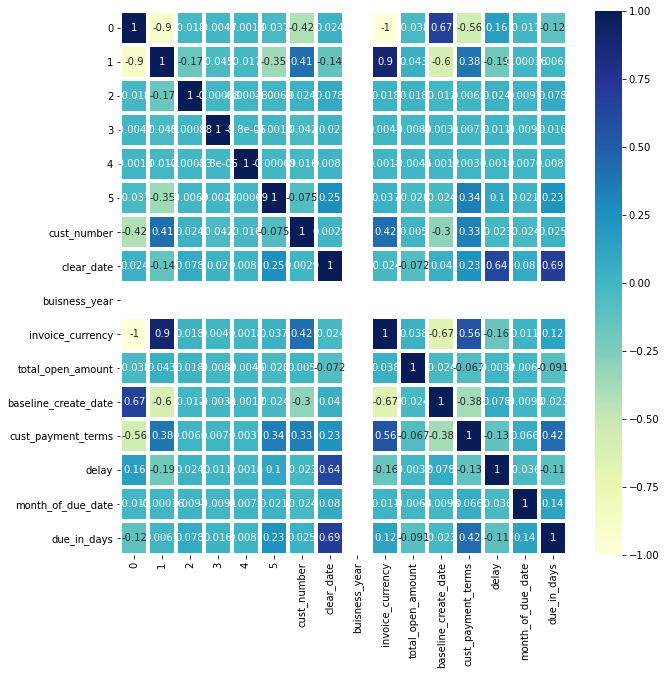

In [35]:
fig,ax = plt.subplots(figsize=(10,10))  
sns.heatmap(training_set.corr(),annot=True,cmap="YlGnBu",vmin=-1,vmax=1,linewidths=3,ax=ax)

In [36]:
training_set['delay'].describe()

count    30114.000000
mean         0.680913
std         10.494053
min        -76.000000
25%         -2.000000
50%          0.000000
75%          2.000000
max        205.000000
Name: delay, dtype: float64

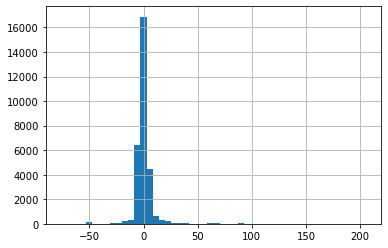

In [37]:
training_set['delay'].hist(bins=50)
plt.show()

It is essential to remove the outliers for the model, so it can learn efficiently.

In [38]:
training_set.drop(training_set[training_set.delay > 100 ].index, inplace = True)
training_set.drop(training_set[training_set.delay < -50 ].index, inplace = True)
training_set.reset_index(inplace = True, drop = True)

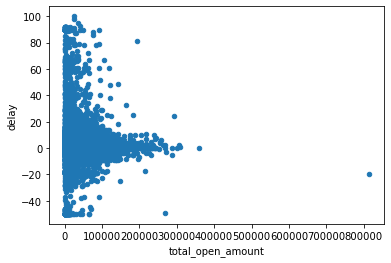

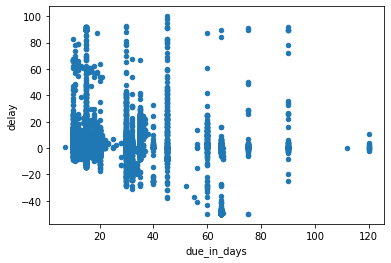

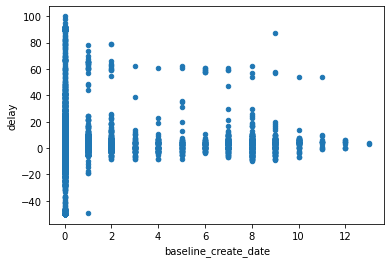

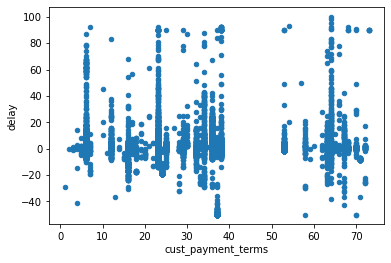

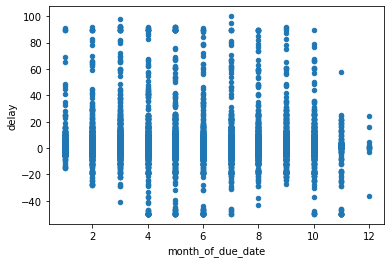

In [39]:
training_set.plot(kind = 'scatter',  x= 'total_open_amount', y= 'delay')
plt.show()
training_set.plot(kind = 'scatter',  x= 'due_in_days', y= 'delay')
plt.show()
training_set.plot(kind = 'scatter',  x= 'baseline_create_date', y= 'delay')
plt.show()
training_set.plot(kind = 'scatter',  x= 'cust_payment_terms', y= 'delay')
plt.show()
training_set.plot(kind = 'scatter',  x= 'month_of_due_date', y= 'delay')
plt.show()

There is no clear cut effect of due date and baseline create on delay. There are delays in short term invoices as well as long term invoices. Thus, due date and baseline create date are not important features to understand delay. These column will be dropped during training and predicting.
Month of due date has some effect on delay and will be used in the model

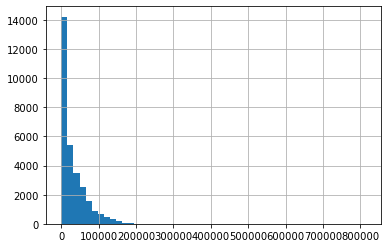

In [40]:
training_set['total_open_amount'].hist(bins = 50)
plt.show()

We can infer that a large number of invoices have a small total open amount. 
As total open amount increases, number of data points decrease.

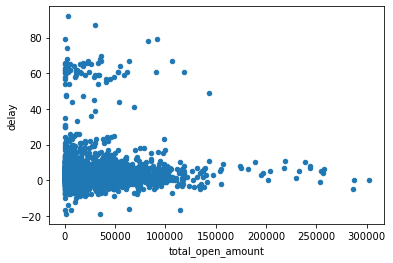

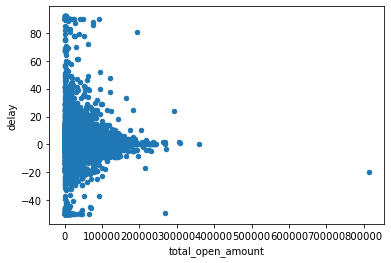

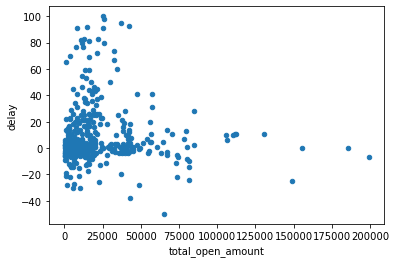

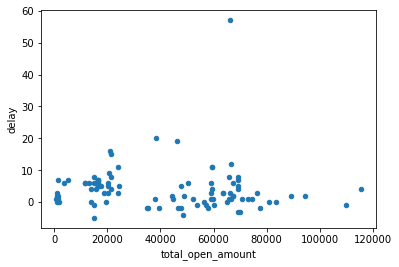

In [41]:
training_set[training_set['business_code_1'] == 'CA02'].plot(kind = 'scatter', x = 'total_open_amount', y = 'delay')
plt.show()
training_set[training_set['business_code_1'] == 'U001'].plot(kind = 'scatter', x = 'total_open_amount', y = 'delay')
plt.show()
training_set[training_set['business_code_1'] == 'U013'].plot(kind = 'scatter', x = 'total_open_amount', y = 'delay')
plt.show()
training_set[training_set['business_code_1'] == 'U002'].plot(kind = 'scatter', x = 'total_open_amount', y = 'delay')
plt.show()

1. CA02 business type is cleared around the due date. The delay is mostly +- 25.
2. larger amounts in U001 business is cleared around the due date.
3. Not much can be said about U013.
4. The delay in U002 is also less and the amounts are cleared faster.

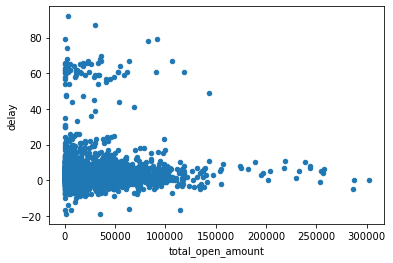

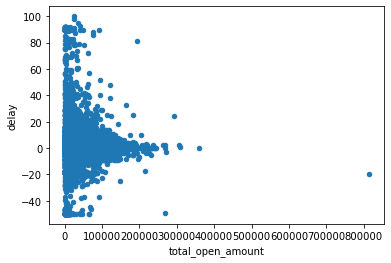

In [42]:
training_set[training_set['invoice_currency'] == 0].plot(kind = 'scatter', x = 'total_open_amount', y = 'delay')
plt.show()
training_set[training_set['invoice_currency'] == 1].plot(kind = 'scatter', x = 'total_open_amount', y = 'delay')
plt.show()

The invoice currency plot for CAD is the same as the plot for business type CA02. Hence the effect of currency is incorporated in the business type column. Hence we will drop this column in training the model

In [43]:
training_set.baseline_create_date.value_counts()

0     27931
1       819
2       303
8       257
7       174
9       144
4        77
6        68
3        67
5        65
10       60
11       15
12        9
13        2
Name: baseline_create_date, dtype: int64

Generally, baseline create date is on the same day as document create date. Thus the payment window generally opens on the same day on which the document is created.

In [44]:
training_set.cust_payment_terms_1.value_counts()

NAA8    12876
NAH4     8257
CA10     2498
NAC6     1094
NAAX      752
NAD1      607
NAU5      586
NAG2      554
NAGD      542
NA32      516
NA10      264
NAD5      257
NAVE      181
NAVF      170
NAAW      137
NAWN      108
NAVR       79
NAVQ       75
NAUZ       53
NAWP       52
NAWU       37
NA38       33
NAVM       33
NA3B       31
NACB       27
NABG       27
CA30       24
NAD4       16
C106       14
NA3F       13
NA84       13
NAVL       11
NAVD        8
BR56        6
NA9X        5
NAX2        5
NA31        5
NA8Q        4
BR12        3
CAX2        3
NA25        3
NAV2        2
NAUI        2
NA24        1
B052        1
NAD8        1
B112        1
NAUX        1
MC15        1
NAV9        1
NABD        1
Name: cust_payment_terms_1, dtype: int64

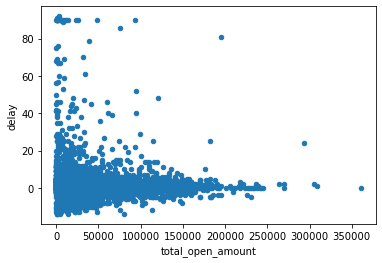

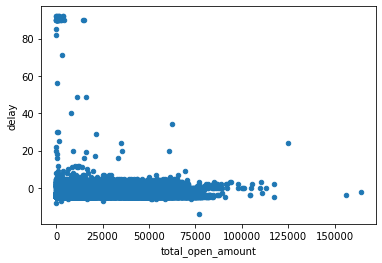

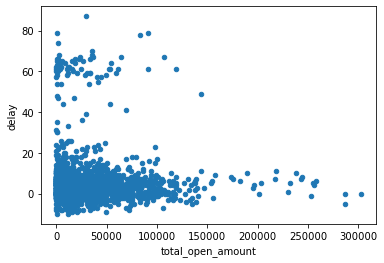

In [45]:
training_set[training_set['cust_payment_terms_1'] == 'NAA8'].plot(kind = 'scatter', x = 'total_open_amount', y = 'delay')
plt.show()
training_set[training_set['cust_payment_terms_1'] == 'NAH4'].plot(kind = 'scatter', x = 'total_open_amount', y = 'delay')
plt.show()
training_set[training_set['cust_payment_terms_1'] == 'CA10'].plot(kind = 'scatter', x = 'total_open_amount', y = 'delay')
plt.show()

There are many types of cust payment terms which have a very few data points. Hence it is not enough to be a relevant feature in the model. Also if we look at the curves of delay vs amount for the top three most abundant cust payment terms, we find that there is not much difference in the variance, max and min values of delay. Hence we should drop this column as well while training the model and predicting the outputs.

Hence by EDA we can conclude the important features which we need to train the model.
1. Business Code
2. Month of due date 
3. Total Open Amount

# 3. Splitting into dependent and independent variables.

In [46]:
training_set.columns

Index(['0', '1', '2', '3', '4', '5', 'cust_number', 'clear_date',
       'buisness_year', 'document_create_date.1', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'cust_payment_terms_1', 'business_code_1',
       'delay', 'month_of_due_date', 'due_in_days'],
      dtype='object')

##### Y_train is the delay column of training set.
##### Y_val is the delay column of validation set.
##### Y_test is the delay column of test set.

In [47]:
Y_train = training_set.iloc[:,-3].values
Y_val = val.iloc[:,-3].values
Y_test = test.iloc[:,-3].values
training_set.columns

Index(['0', '1', '2', '3', '4', '5', 'cust_number', 'clear_date',
       'buisness_year', 'document_create_date.1', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'cust_payment_terms_1', 'business_code_1',
       'delay', 'month_of_due_date', 'due_in_days'],
      dtype='object')

<!-- Y_train = training_set.iloc[:,-3].values
Y_val = val.iloc[:,-3].values
Y_test = test.iloc[:,-3].values
training_set.columns -->

In [48]:
training_set.drop(['cust_number', 'clear_date', 'buisness_year', 'document_create_date.1', 'due_in_date',
       'invoice_currency', 'baseline_create_date',
       'cust_payment_terms', 'cust_payment_terms_1', 'business_code_1','delay',
        'due_in_days'], axis = 1, inplace= True)
val.drop(['cust_number', 'clear_date', 'buisness_year', 'document_create_date.1', 'due_in_date',
       'invoice_currency', 'baseline_create_date',
       'cust_payment_terms', 'cust_payment_terms_1', 'business_code_1', 'delay',
        'due_in_days'], axis = 1, inplace= True)
test.drop(['cust_number', 'clear_date', 'buisness_year', 'document_create_date.1', 'due_in_date',
       'invoice_currency', 'baseline_create_date',
       'cust_payment_terms', 'cust_payment_terms_1', 'business_code_1', 'delay',
        'due_in_days'], axis = 1, inplace= True)
training_set.columns

Index(['0', '1', '2', '3', '4', '5', 'total_open_amount', 'month_of_due_date'], dtype='object')

# 4 Feature Scaling (not required for Tree based models)

##### We are using Standard Scaler for Feature Scaling. 

In [49]:
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
sc_Y_train = StandardScaler()
X_train_scaled = sc_X_train.fit_transform(training_set)
Y_train_scaled = sc_Y_train.fit_transform(Y_train.reshape(-1,1))

# 5. Training different models and checking RMSE.

In [50]:
from sklearn.metrics import mean_squared_error

## 5.1 Multiple Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train_scaled, Y_train_scaled)

LinearRegression()

Explaining the first Line here, 

Y_pred_val1_linear is the variable to store our predictions for val set
Since linear model takes in standardised inputs, we use sc_x_train to first standardise the val set (innermost bracket).
Then we use the predict functions to predict the delays.. but the output is standardised.. to bring it back to original scale we use inverse_transform function... And we need to inverse transform the standardised delay predictions so we use sx_y_train object's inverse transform method.

The next 2 lines are a way to print our predictions and original delays side by side.

In [52]:
Y_pred_val_linear = sc_Y_train.inverse_transform(regressor_linear.predict(sc_X_train.transform(val)))
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred_val_linear.reshape(len(Y_pred_val_linear),1), Y_val.reshape(len(Y_val),1)),1))

[[-0.19  1.  ]
 [-0.2   1.  ]
 [-0.24  1.  ]
 ...
 [-0.38  0.  ]
 [-0.43  3.  ]
 [-0.35 -4.  ]]


In [53]:
print(np.sqrt(mean_squared_error(Y_val, Y_pred_val_linear))) #RMSE on val set

5.319850060842998


In [54]:
Y_pred_test_linear = sc_Y_train.inverse_transform(regressor_linear.predict(sc_X_train.transform(test)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test_linear))) #RMSE on test set

9.06535461390192


In [55]:
Y_pred_test_linear.max()

9.59997193434786

This model is greatly overfitting on our training set.

## 5.2 SVR

In [56]:
from sklearn.svm import SVR
regressor_SVR = SVR(kernel = 'rbf')
regressor_SVR.fit(X_train_scaled,Y_train_scaled.ravel())

SVR()

In [57]:
Y_pred_val_SVR = sc_Y_train.inverse_transform(regressor_SVR.predict(sc_X_train.transform(val)))

In [58]:
print(np.sqrt(mean_squared_error(Y_val,Y_pred_val_SVR))) #RMSE on val set

5.2657784888500485


In [59]:
Y_pred_test_SVR = sc_Y_train.inverse_transform(regressor_SVR.predict(sc_X_train.transform(test)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test_SVR))) #RMSE on test set

9.04877966383206


In [60]:
Y_pred_test_SVR.max()

10.102822730552566

Poor performance on test set. Also the range of predictions is low. Max delay is just 10 days, which is very unlikely to occur.

## 5.3 Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(training_set, Y_train)

DecisionTreeRegressor(random_state=0)

In [62]:
Y_pred_val_dt = regressor_dt.predict(val)
print(np.sqrt(mean_squared_error(Y_val, Y_pred_val_dt)))  #RMSE on val set

17.451042605757483


As, the validation set is only giving such high RMSE, the test will be worse, so we are discarding this method and not even going to bother using the test set.

## 5.5 Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 30, random_state = 0)
regressor_rf.fit(training_set, Y_train)

RandomForestRegressor(n_estimators=30, random_state=0)

In [64]:
Y_pred_val_rf = regressor_rf.predict(val)
print(np.sqrt(mean_squared_error(Y_val,Y_pred_val_rf))) #RMSE on val set

12.041050951044634


In [65]:
Y_pred_test_rf = regressor_rf.predict(test)
print(np.sqrt(mean_squared_error(Y_test,Y_pred_test_rf))) #RMSE on test set

10.903386093707242


In [66]:
Y_pred_test_rf.max()     #Here, we are checking the max value we got from test.

67.26666666666667

##### Conclusion: I am selecting Random Forest Regression Model to predict the unknown data.

# 6. Predicting the Unknown Data.

In [67]:
unknown_data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [68]:
unknown_data_1 = unknown_data.copy()

In [69]:
unknown_data_1['cust_payment_terms_1'] = unknown_data_1['cust_payment_terms']
unknown_data_1.drop(['name_customer', 'doc_id', 'document type', 'posting_id', 'area_business', 'invoice_id', 'isOpen'],
                 axis = 1, inplace = True)

In [70]:
unknown_data_1['business_code_1'] = unknown_data_1['business_code']
unknown_data_1 = np.array(ct.transform(unknown_data_1))
unknown_data_1 = pd.DataFrame(unknown_data_1,columns=['0', '1', '2', '3', '4', '5', 'cust_number', 'clear_date',
       'buisness_year', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms',
       'cust_payment_terms_1', 'Business_code_1'])

In [71]:
unknown_data_1.reset_index(inplace= True, drop= True)
unknown_data_1 = currency_convertor(unknown_data_1)

In [72]:
unknown_data_1['due_in_date'] = pd.to_datetime(unknown_data_1['due_in_date'],format='%Y%m%d')
unknown_data_1['month_of_due_date'] = unknown_data_1['due_in_date'].dt.month

In [73]:
unknown_data_1.drop(['cust_number', 'clear_date', 'buisness_year', 'posting_date', 'document_create_date', 
                   'document_create_date.1', 'due_in_date', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms',
                   'cust_payment_terms_1', 'Business_code_1'], axis = 1, inplace= True)
unknown_data_1.columns

Index(['0', '1', '2', '3', '4', '5', 'total_open_amount', 'month_of_due_date'], dtype='object')

In [74]:
predictions = regressor_rf.predict(unknown_data_1)  
predictions = np.round(predictions)  #rounding off our predicted delays, as days can not be decimal values.

In [75]:
unknown_data['due_in_date'] = pd.to_datetime(unknown_data['due_in_date'],format='%Y%m%d')

In [76]:
unknown_data.reset_index(inplace = True, drop = True)

In [77]:
for index in unknown_data.index:    #calculation of our clear date by iterating and adding predicted delay to due dates.
    unknown_data.loc[index, 'clear_date'] = (unknown_data.iloc[index].due_in_date + pd.Timedelta(predictions[index])).date()

In [78]:
unknown_data['bucket'] = predictions 

#### Here we are bucketizing our output based on our bucketing conditions.

###### Buckets Summary 
###### Cleared before due date               [ < 0 days]
######  Bucket 1                                    [0-15 days]                           
###### Bucket 2                                    [16-30 days]                
###### Bucket 3                                   [31-45 days]             
###### Bucket 4                                  [46-60 days]              
###### Bucket 5                                 [Greater than 60 days]

In [79]:
for index in unknown_data.index:
    if unknown_data.loc[index,'bucket'] < 0:
        unknown_data.loc[index, 'bucket'] = 'Cleared before due date             :'
    elif unknown_data.loc[index,'bucket'] <=15:
        unknown_data.loc[index,'bucket'] = 'Bucket 1 [0-15 days]                 :'
    elif unknown_data.loc[index,'bucket'] <= 30:
        unknown_data.loc[index,'bucket'] = 'Bucket 2 [16-30 days]                :'
    elif unknown_data.loc[index,'bucket'] <= 45:
        unknown_data.loc[index,'bucket'] = 'Bucket 3 [31-45 days]                :'
    elif unknown_data.loc[index,'bucket'] <= 60:
        unknown_data.loc[index,'bucket'] = 'Bucket 4 [46-60 days]                :'
    else:
        unknown_data.loc[index,'bucket'] = 'Bucket 5 [Greater than 60 days]      :'

#### Final Output with Buckets.

In [80]:
print('        Buckets                        Number of invoices')
unknown_data.bucket.value_counts()


        Buckets                        Number of invoices


Bucket 1 [0-15 days]                 :    2462
Cleared before due date              :    1622
Bucket 2 [16-30 days]                :      52
Bucket 3 [31-45 days]                :      19
Bucket 4 [46-60 days]                :      18
Bucket 5 [Greater than 60 days]      :       3
Name: bucket, dtype: int64

##### The output here is sorted because .value_counts() returns by the highest frequency
##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### Submitted by  :  Aditya Chaudhary
#### Roll Number   :  1805455
#### High Radius Tech Track Machine Learning Project.